# Dataset Metadata

**Source:** `seaborn.load_dataset('titanic')`  
**Rows:** 891  
**Columns:** 15  

#### Column Descriptions:

| Column         | Description                                           |
|----------------|-------------------------------------------------------|
| survived       | Survival (0 = No, 1 = Yes)                            |
| pclass         | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)              |
| sex            | Gender of the passenger                              |
| age            | Age in years                                          |
| sibsp          | Number of siblings/spouses aboard                    |
| parch          | Number of parents/children aboard                    |
| fare           | Passenger fare                                        |
| embarked       | Port of Embarkation (C = Cherbourg, Q = Queenstown)  |
| class          | Categorical representation of ticket class           |
| who            | man/woman/child                                      |
| deck           | Deck letter                                           |
| embark_town    | Embarkation town                                      |
| alive          | Survival (yes/no)                                     |
| alone          | Whether passenger was alone                           |


# 1. **Load the Dataset**

In [34]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic_data = sns.load_dataset('titanic')

# Display first few rows
titanic_data.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 2. Data Summary and Missing Values

In [30]:
# Shape and column info
print("Shape of the dataset:", titanic_data.shape)
print("\nColumns:\n", titanic_data.columns)

Shape of the dataset: (891, 17)

Columns:
 Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'family_size', 'age_group'],
      dtype='object')


In [31]:
# Check missing values
print("\nMissing values:\n", titanic_data.isnull().sum())


Missing values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
family_size      0
age_group      177
dtype: int64


In [32]:
# Data types and summary
print("\nData types:\n", titanic_data.dtypes)
print("\nSummary Statistics:\n", titanic_data.describe(include='all'))


Data types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
family_size       int64
age_group      category
dtype: object

Summary Statistics:
           survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       

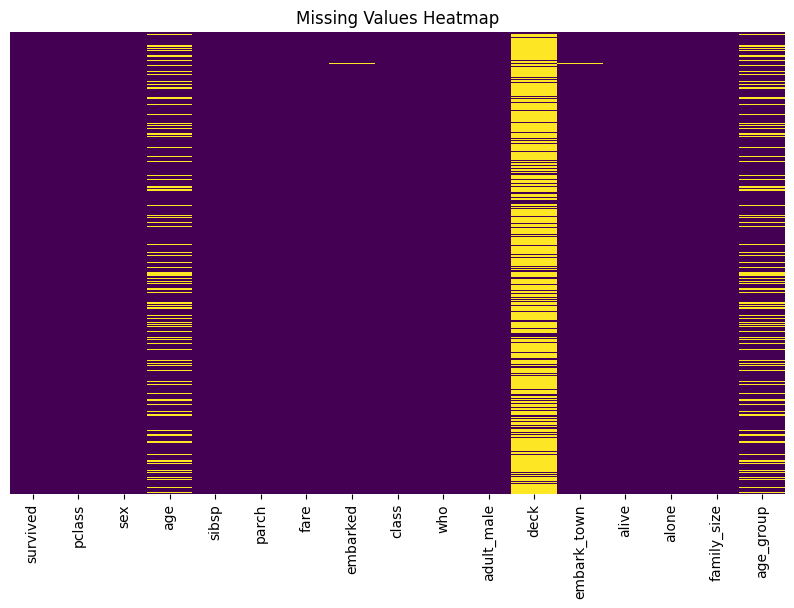

In [33]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()


# Impute Missing Values with ML

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Make a copy
titanic_data_filled = titanic_data.copy()

# Separate features
numerical_cols = titanic_data_filled.select_dtypes(include=['number']).columns
categorical_cols = titanic_data_filled.select_dtypes(exclude=['number']).columns

# Fill numeric using IterativeImputer
imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
titanic_data_filled[numerical_cols] = imputer.fit_transform(titanic_data_filled[numerical_cols])

# Fill categorical with mode
for col in categorical_cols:
    titanic_data_filled[col] = titanic_data_filled[col].fillna(titanic_data_filled[col].mode()[0])

# Check again
print("\nMissing values after imputation:\n", titanic_data_filled.isnull().sum())



Missing values after imputation:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


# 3. Univariate Analysis

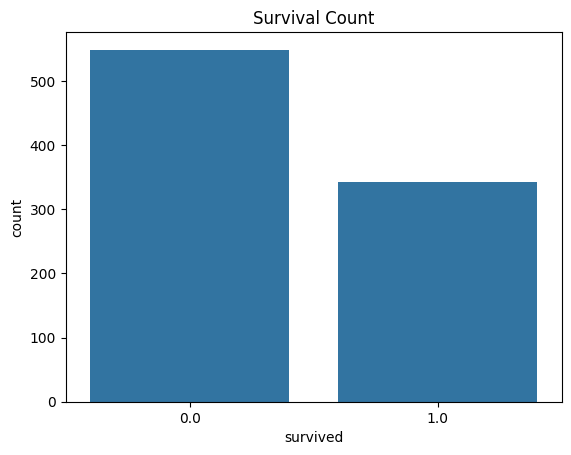

In [26]:
# Survived
sns.countplot(x='survived', data=titanic_data_filled)
plt.title('Survival Count')
plt.show()

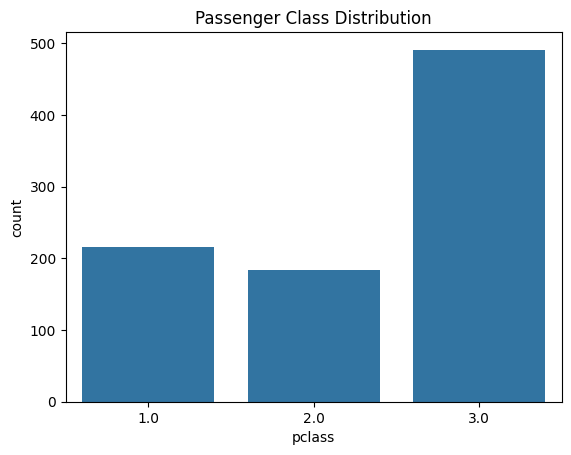

In [27]:
# Pclass
sns.countplot(x='pclass', data=titanic_data_filled)
plt.title('Passenger Class Distribution')
plt.show()


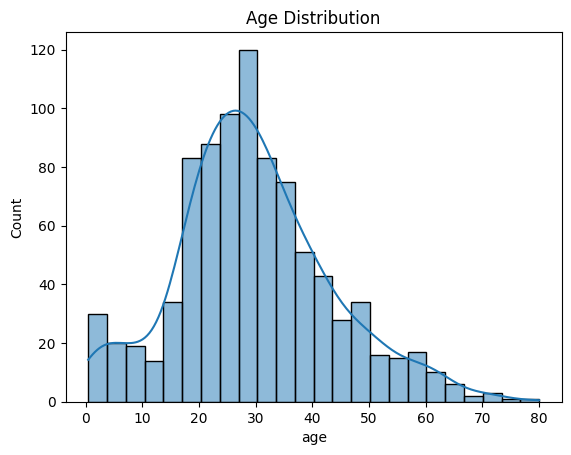

In [28]:
# Age
sns.histplot(x='age', data=titanic_data_filled, kde=True)
plt.title('Age Distribution')
plt.show()

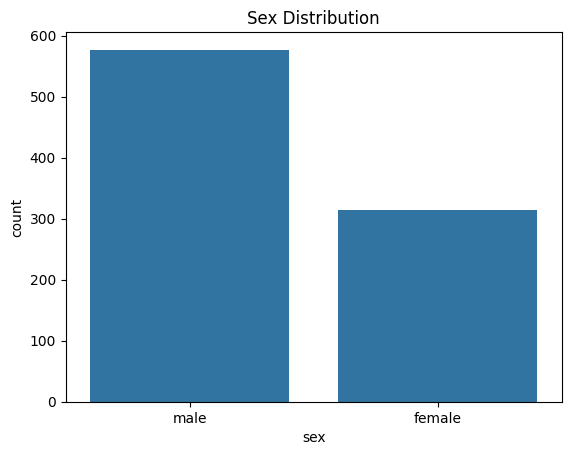

In [29]:
# Sex
sns.countplot(x='sex', data=titanic_data_filled)
plt.title('Sex Distribution')
plt.show()


# 4. Bivariate Analysis

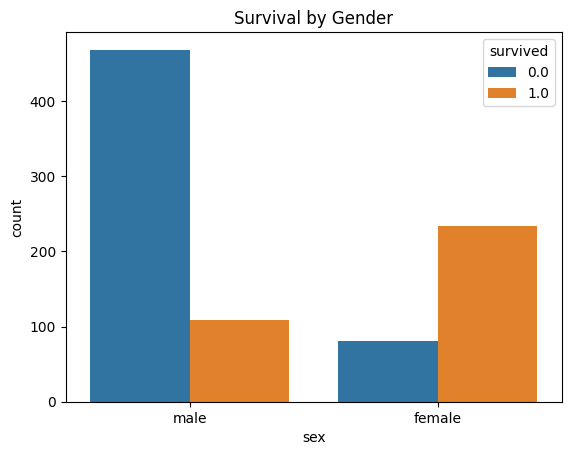

In [25]:
# Survival by gender
sns.countplot(x='sex', hue='survived', data=titanic_data_filled)
plt.title('Survival by Gender')
plt.show()

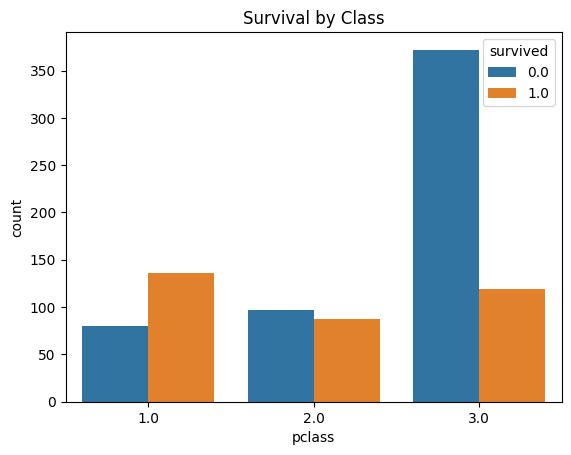

In [24]:
# Survival by class
sns.countplot(x='pclass', hue='survived', data=titanic_data_filled)
plt.title('Survival by Class')
plt.show()

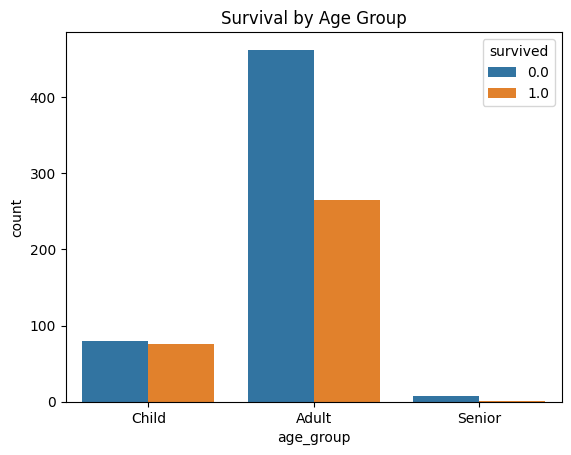

In [23]:
# Create age groups
titanic_data_filled['age_group'] = pd.cut(titanic_data_filled['age'], bins=[0,18,65,100], labels=['Child','Adult','Senior'])
sns.countplot(x='age_group', hue='survived', data=titanic_data_filled)
plt.title('Survival by Age Group')
plt.show()

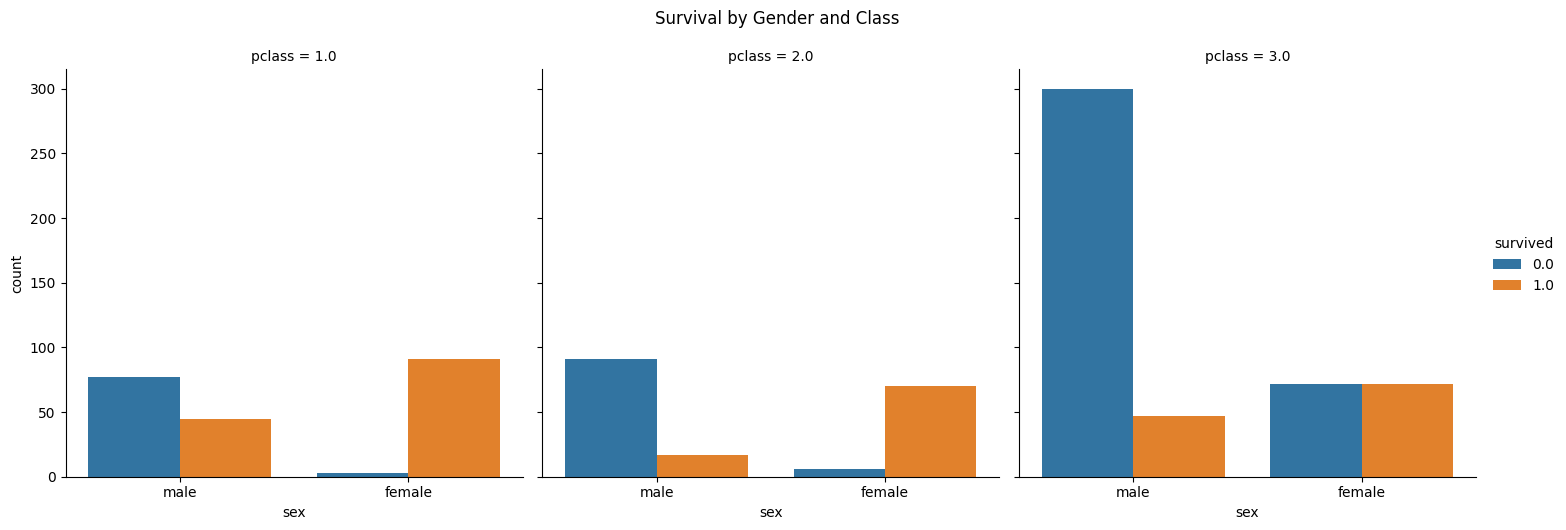

In [22]:
# Survival by gender and class
sns.catplot(x='sex', hue='survived', col='pclass', kind='count', data=titanic_data_filled)
plt.suptitle('Survival by Gender and Class', y=1.05)
plt.show()


# 5. Insights from Analysis

- **Gender:** Women had higher survival rates.
- **Class:** 1st-class passengers were more likely to survive.
- **Age:** Children had better survival odds.


# 6. Survival Analysis

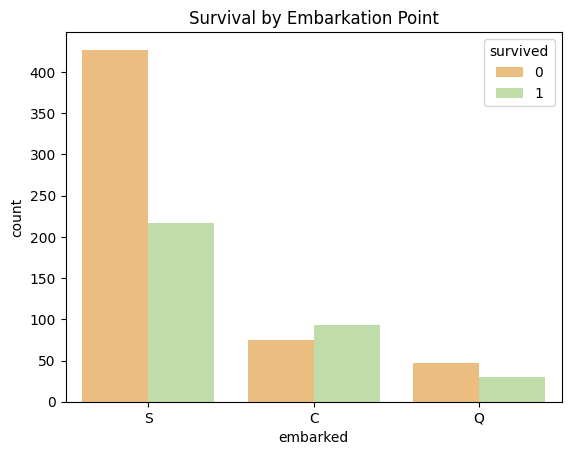

In [19]:
# Embarkation Point
sns.countplot(x='embarked', hue='survived', data=titanic_data, palette='Spectral')
plt.title('Survival by Embarkation Point')
plt.show()

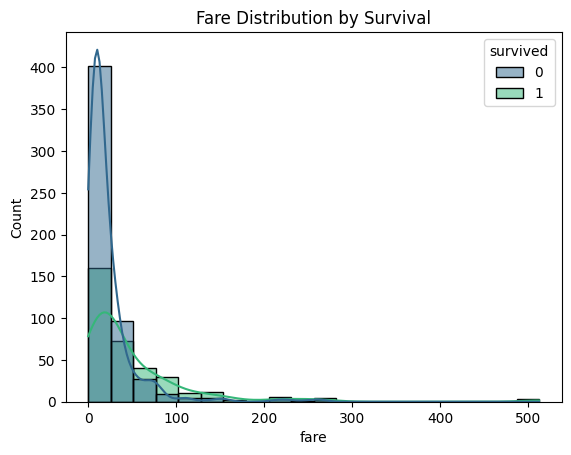

In [20]:
# Fare distribution
sns.histplot(titanic_data, x='fare', hue='survived', bins=20, kde=True, palette='viridis')
plt.title('Fare Distribution by Survival')
plt.show()

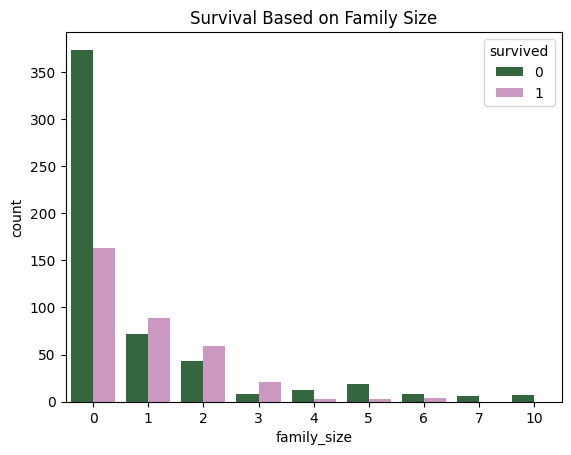

In [21]:
# Family Size
titanic_data['family_size'] = titanic_data['sibsp'] + titanic_data['parch']
sns.countplot(x='family_size', hue='survived', data=titanic_data, palette='cubehelix')
plt.title('Survival Based on Family Size')
plt.show()


# 7. Feature Engineering

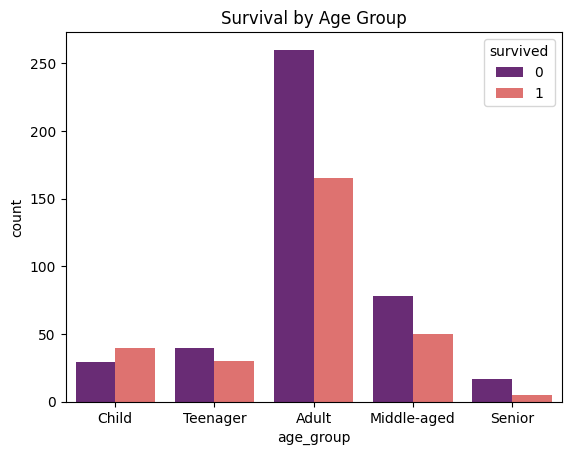

In [17]:
# Create age groups
bins = [0, 12, 18, 40, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']
titanic_data['age_group'] = pd.cut(titanic_data['age'], bins=bins, labels=labels)

# Visualize
sns.countplot(x='age_group', hue='survived', data=titanic_data, palette='magma')
plt.title('Survival by Age Group')
plt.show()


# 8. Correlation Heatmap

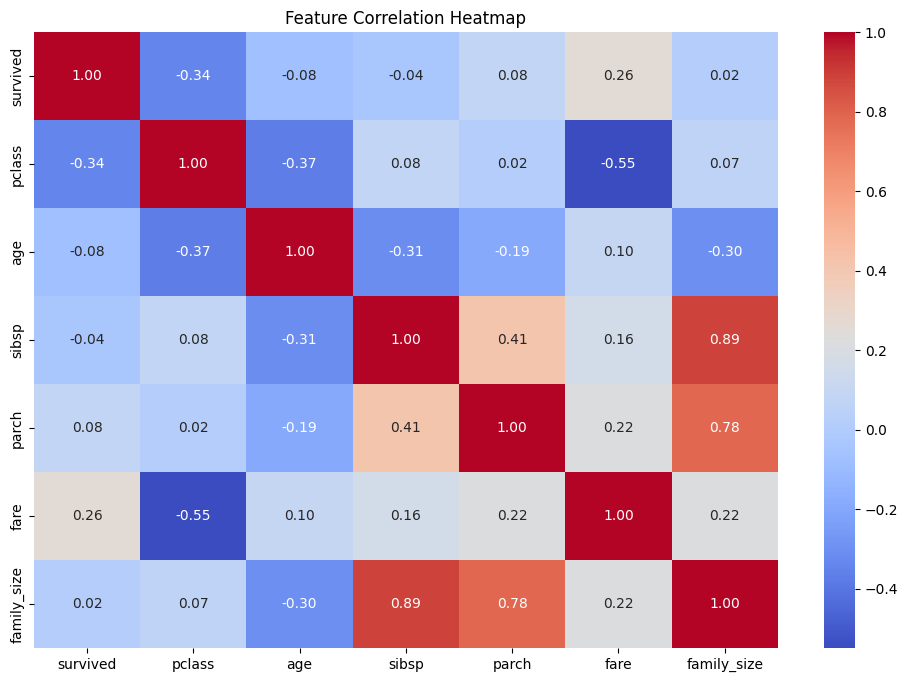

In [18]:
plt.figure(figsize=(12, 8))
numeric_features = titanic_data.select_dtypes(include=np.number)
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


# **Key Findings:**

- **Gender:** Women were prioritized in rescue efforts.
- **Class:** Wealth equated to better survival odds.
- **Age:** Children had favorable outcomes; elderly did not.
- **Embarkation:** Cherbourg passengers had highest survival rates.
- **Family:** Small families fared better than large or solo passengers.
